#### Task 2: Data Preprocessing

Steps:
- Handle missing values and outliers.
- Encode categorical variables.
- Normalize/standardize numerical features.
- Split the data into training and testing sets.
- Script: scripts/data_preprocessing.py

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
#!pwd
datapath = "../data/boston_housing.csv"
datadf = pd.read_csv(datapath)

#display a few rows of the data
datadf.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
datadf.shape

(506, 14)

In [3]:
# Finding percentage outliers in every column

for k, v in datadf.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(datadf)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))


Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [5]:
# removing outliers on target variable medv, refer to boxplots in EDA

datadf = datadf[~(datadf['medv'] >= 50)]

In [6]:
datadf.shape

(490, 14)

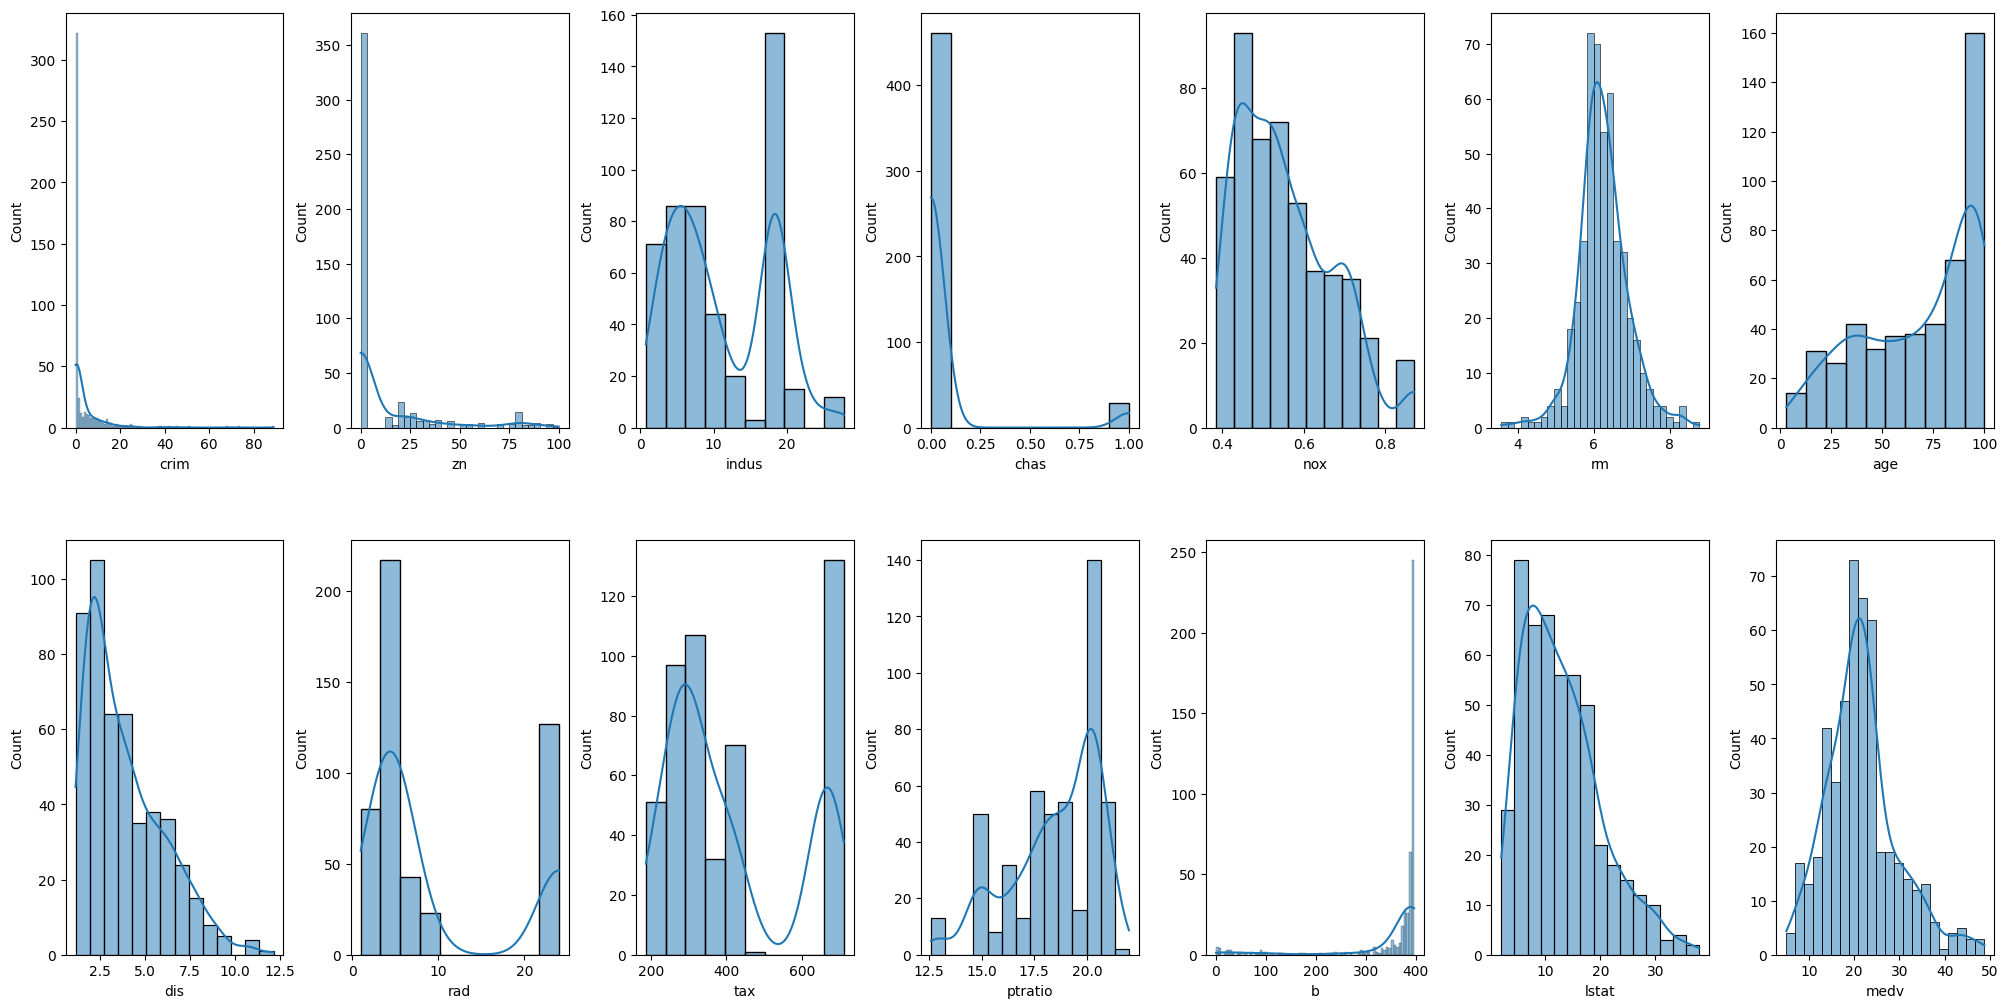

In [11]:
#visualization of distribution of variables

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in datadf.items():
    sns.histplot(v, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


crim, zn, b are highly skewed, chas is categorical. medv is normal distributed

In [13]:
# encode categorical variable chas
datadf['chas'].value_counts()

chas
0    461
1     29
Name: count, dtype: int64

The categorical variable `chas` is already encoded to 0 and 1 and type is `int`, there is no need for encoding

In [20]:
# Normalize/standardize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datadf_scaled = scaler.fit_transform(datadf) #returns numpy array
datadf_scaledf = pd.DataFrame(datadf_scaled, columns=datadf.columns)
datadf_scaledf.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.058148,0.0,0.314815,0.577505,0.641607,0.268711,0.000000,0.208015,0.287234,1.000000,0.083356,0.433790
1,0.000236,0.00,0.234444,0.0,0.172840,0.547998,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.198944,0.378995
2,0.000236,0.00,0.234444,0.0,0.172840,0.694386,0.599382,0.348524,0.043478,0.104962,0.553191,0.989737,0.056960,0.678082
3,0.000293,0.00,0.053333,0.0,0.150206,0.658555,0.441813,0.448173,0.086957,0.066794,0.648936,0.994276,0.026674,0.648402
4,0.000705,0.00,0.053333,0.0,0.150206,0.687105,0.528321,0.448173,0.086957,0.066794,0.648936,1.000000,0.093081,0.712329


<Axes: >

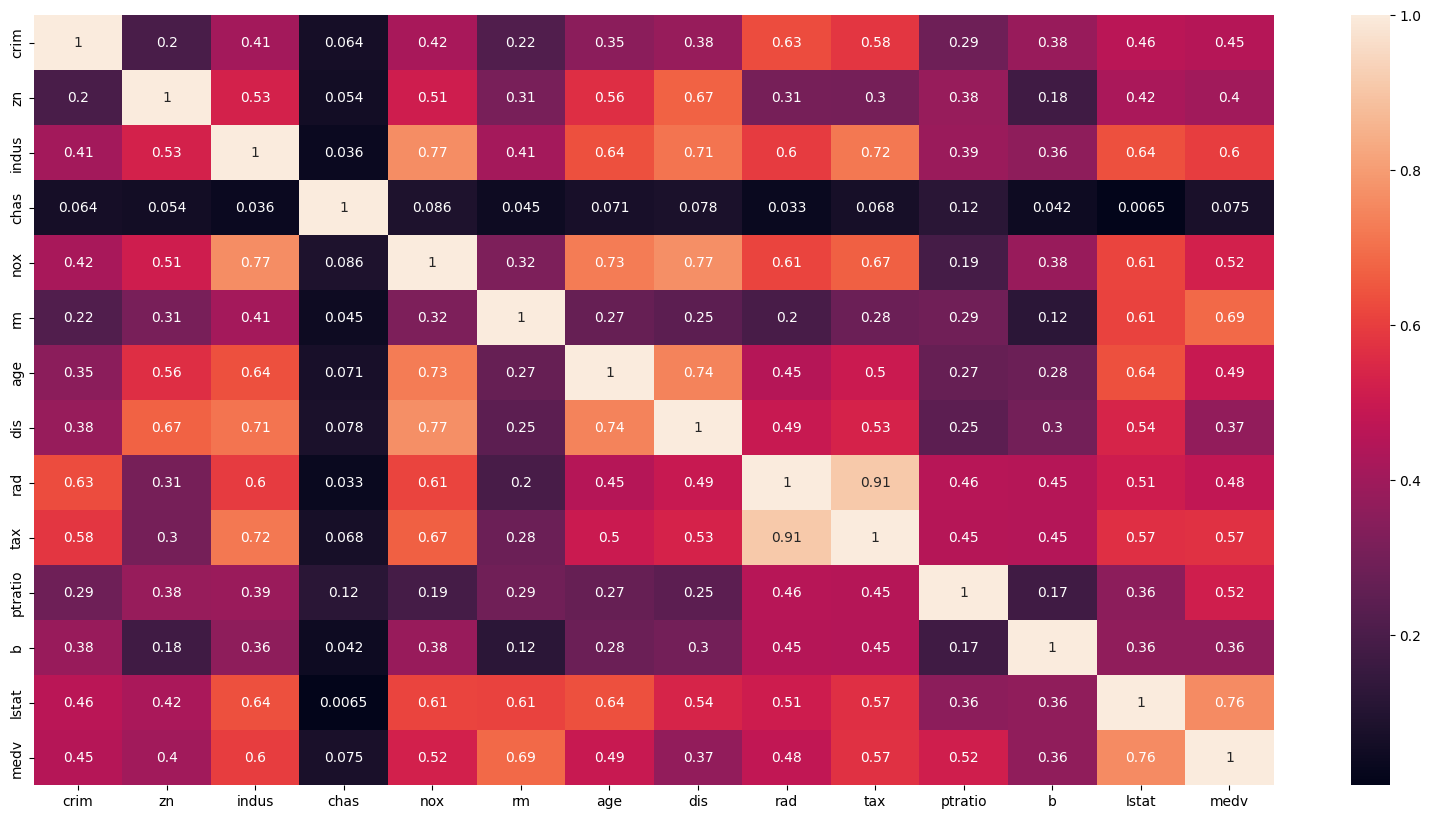

In [21]:
# pairwise correlation on data

plt.figure(figsize=(20, 10))
sns.heatmap(datadf_scaledf.corr().abs(),  annot=True)

Findings on correlation:
- variables with correlation score above 0.5 with target medv are good predictors
- varibles for modeling at `indus, nox, rm, tax, ptratio and lstat`
- `age` and `dis` have correlation below 0.5 but have useful information

In [22]:
#features and target variables
X = datadf_scaledf[['indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']]       #features
y = datadf_scaledf['medv'] #target

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [25]:
#Save output for modeling later

np.savez("train_test_split.npz",X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)